# Análisis Exploratorio y Curación de Datos

**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes necesarios 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
%matplotlib inline

In [49]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Carga de datos

Carga el conjunto de datos 'galaxias_1.csv' como un DataFrame 

- Definir el id como index del DataFrame
- Mostrar el tipo de dato de cada columna 
- Observar si hay filas e indices duplicados
- Realicen algunas exploraciones más sobre el dataset
- Estudiar y solucionar los outliers o valores faltantes 

In [3]:
data = pd.read_csv("dataset/galaxias_1.csv")
data.head()

objID          ra        dec  modelMag_u  modelMag_g  \
0  1,23765119242489E+018  116.519097  39.886407    17.76235    16.72601   
1  1,23765149575578E+018  116.451900  41.421270    18.12179    16.26214   
2  1,23767370611537E+018  115.946713  41.918877    18.57293    17.42053   
3   1,2376737066523E+018  116.051943  42.287231    21.37438    19.77335   
4  1,23765127349266E+018  117.287392  43.434782    19.18845    17.99682   

   modelMag_r  modelMag_i  modelMag_z  petroR90_r         z     Color  \
0    16.33972    16.06614    15.90478    8.393773  0.041521 -1.422625   
1    15.39272    14.97515    14.65105    9.674847  0.040211 -2.729061   
2    17.01788    16.75617    16.70899   11.277470  0.024386 -1.555044   
3    19.55791    20.35405    18.88184    1.539542  0.039137 -1.816479   
4    17.51119    17.26241    17.09056   12.471450  0.042591 -1.677259   

   elliptical  spiral  uncertain  
0           0       1          0  
1           0       0          1  
2           0       0          1  
3           0       0          1  
4           0       0          1

In [4]:
data.describe()

ra           dec    modelMag_u    modelMag_g    modelMag_r  \
count  92102.000000  92102.000000  92102.000000  92102.000000  92102.000000   
mean     181.086338     24.723737    184.319135    171.045909    160.125000   
std       61.177151     18.853785   1737.511731   1612.598539   1525.504087   
min        0.008745    -11.202394  -9999.000000  -9999.000000     11.524090   
25%      150.287271      9.115292     17.733585     16.260870     15.572525   
50%      183.219954     23.111344     18.453880     17.094630     16.506160   
75%      222.722975     38.982500     19.047078     17.734885     17.227810   
max      359.965567     70.133213  25756.000000  20542.000000  19138.000000   

         modelMag_i    modelMag_z    petroR90_r             z         Color  \
count  92102.000000  92102.000000  92102.000000  92102.000000  92102.000000   
mean     163.614406    139.806936     57.032318      0.036092     -3.462711   
std     1530.181510   1402.492646    923.367743      0.008435     76.781199   
min       11.220580  -9999.000000      0.842248      0.020001  -2902.000000   
25%       15.210220     14.919152      6.120165      0.029082     -2.511168   
50%       16.188085     15.947850      8.365595      0.036321     -1.995331   
75%       16.947265     16.753538     11.368645      0.043620     -1.607067   
max    23871.000000  20823.000000  78255.000000      0.050000  10015.860000   

         elliptical        spiral     uncertain  
count  92102.000000  92102.000000  92102.000000  
mean       0.089651      0.326225      0.584124  
std        0.285682      0.468833      0.492875  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      1.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92102 entries, 0 to 92101
Data columns (total 14 columns):
objID         92102 non-null object
ra            92102 non-null float64
dec           92102 non-null float64
modelMag_u    92102 non-null float64
modelMag_g    92102 non-null float64
modelMag_r    92102 non-null float64
modelMag_i    92102 non-null float64
modelMag_z    92102 non-null float64
petroR90_r    92102 non-null float64
z             92102 non-null float64
Color         92102 non-null float64
elliptical    92102 non-null int64
spiral        92102 non-null int64
uncertain     92102 non-null int64
dtypes: float64(10), int64(3), object(1)
memory usage: 9.8+ MB


Seteo "objID" como index

In [6]:
data.set_index("objID", inplace=True)

In [7]:
data.head()

ra        dec  modelMag_u  modelMag_g  \
objID                                                                  
1,23765119242489E+018  116.519097  39.886407    17.76235    16.72601   
1,23765149575578E+018  116.451900  41.421270    18.12179    16.26214   
1,23767370611537E+018  115.946713  41.918877    18.57293    17.42053   
1,2376737066523E+018   116.051943  42.287231    21.37438    19.77335   
1,23765127349266E+018  117.287392  43.434782    19.18845    17.99682   

                       modelMag_r  modelMag_i  modelMag_z  petroR90_r  \
objID                                                                   
1,23765119242489E+018    16.33972    16.06614    15.90478    8.393773   
1,23765149575578E+018    15.39272    14.97515    14.65105    9.674847   
1,23767370611537E+018    17.01788    16.75617    16.70899   11.277470   
1,2376737066523E+018     19.55791    20.35405    18.88184    1.539542   
1,23765127349266E+018    17.51119    17.26241    17.09056   12.471450   

                              z     Color  elliptical  spiral  uncertain  
objID                                                                     
1,23765119242489E+018  0.041521 -1.422625           0       1          0  
1,23765149575578E+018  0.040211 -2.729061           0       0          1  
1,23767370611537E+018  0.024386 -1.555044           0       0          1  
1,2376737066523E+018   0.039137 -1.816479           0       0          1  
1,23765127349266E+018  0.042591 -1.677259           0       0          1

Veo que tipos de datos tengo

In [8]:
data.dtypes

ra            float64
dec           float64
modelMag_u    float64
modelMag_g    float64
modelMag_r    float64
modelMag_i    float64
modelMag_z    float64
petroR90_r    float64
z             float64
Color         float64
elliptical      int64
spiral          int64
uncertain       int64
dtype: object

## Veo si tengo valores duplicados

In [9]:
data[data.astype(str).duplicated()].shape

(61, 13)

In [10]:
data[data.index.astype(str).duplicated()].shape[0] / data.shape[0]

0.37372695489783064

In [11]:
data[data.index.astype(str).duplicated()].shape[0]

34421

### Saco los duplicados

In [12]:
data.shape

(92102, 13)

In [13]:
data_cl = data.loc[~(data.index.astype(str).duplicated(keep="first"))]

In [14]:
data_cl.shape

(57681, 13)

In [15]:
data_cl.head()

ra        dec  modelMag_u  modelMag_g  \
objID                                                                  
1,23765119242489E+018  116.519097  39.886407    17.76235    16.72601   
1,23765149575578E+018  116.451900  41.421270    18.12179    16.26214   
1,23767370611537E+018  115.946713  41.918877    18.57293    17.42053   
1,2376737066523E+018   116.051943  42.287231    21.37438    19.77335   
1,23765127349266E+018  117.287392  43.434782    19.18845    17.99682   

                       modelMag_r  modelMag_i  modelMag_z  petroR90_r  \
objID                                                                   
1,23765119242489E+018    16.33972    16.06614    15.90478    8.393773   
1,23765149575578E+018    15.39272    14.97515    14.65105    9.674847   
1,23767370611537E+018    17.01788    16.75617    16.70899   11.277470   
1,2376737066523E+018     19.55791    20.35405    18.88184    1.539542   
1,23765127349266E+018    17.51119    17.26241    17.09056   12.471450   

                              z     Color  elliptical  spiral  uncertain  
objID                                                                     
1,23765119242489E+018  0.041521 -1.422625           0       1          0  
1,23765149575578E+018  0.040211 -2.729061           0       0          1  
1,23767370611537E+018  0.024386 -1.555044           0       0          1  
1,2376737066523E+018   0.039137 -1.816479           0       0          1  
1,23765127349266E+018  0.042591 -1.677259           0       0          1

In [16]:
data_cl[data_cl.index.astype(str).duplicated(keep="first")]

Empty DataFrame
Columns: [ra, dec, modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z, petroR90_r, z, Color, elliptical, spiral, uncertain]
Index: []

Hago un poco más de exploración en el data set

In [17]:
def galaxy_morf(row):
    if row["elliptical"]:
        return "E"
    elif row["spiral"]:
        return "S"
    else:
        return "I"

In [18]:
data_cl["type"] = data_cl.apply(galaxy_morf, axis=1)

/home/frank/anaconda3/envs/diplodatos/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


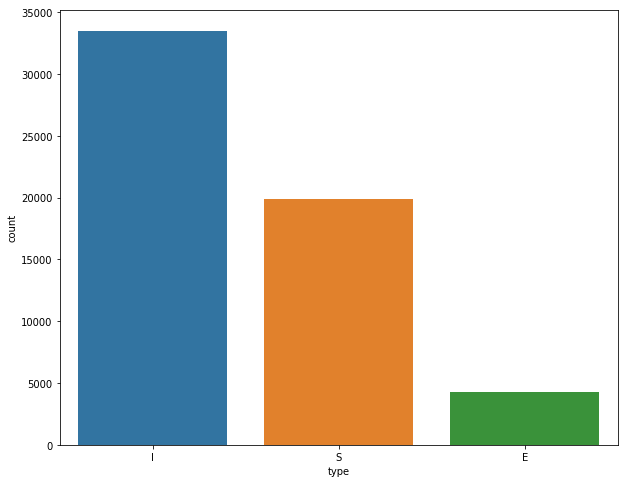

In [19]:
sns.countplot(data_cl["type"], order=["I", "S", "E"])

## Veo valores faltantes

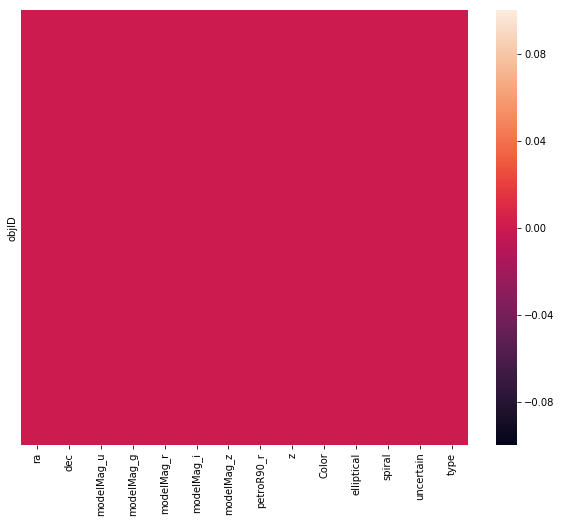

In [20]:
sns.heatmap(data_cl.isna(), yticklabels=False)

No tengo valores NaN. Pero puede que tenga valores que fisicamente no tienen sentido

## Distribucion de datos

In [50]:
def distribution_per_type(df, col_name="", bins=20):
    plt.title(f"{col_name.capitalize()} Distribution")
    sns.distplot(df[df["elliptical"] == 1][col_name],label="elliptical", bins=bins)
    sns.distplot(df[df["spiral"] == 1][col_name],label="spiral", bins=bins)
    sns.distplot(df[df["uncertain"] == 1][col_name],label="irregular", bins=bins)
    plt.legend()
    
def exploratory_plots(df, col_name=""):
    plt.subplot(3, 1, 1)
    distribution_per_type(df, col_name)
    plt.subplot(3, 1, 2)
    plt.title(f"{col_name.capitalize()} Boxplot")
    sns.boxplot(x="type", y=col_name, data=df)
    plt.subplot(3, 1, 3)
    plt.title(f"{col_name.capitalize()} Boxplot w/o Outliers")
    sns.boxplot(x="type", y=col_name, data=df, showfliers=False)
    
    plt.tight_layout()

### Z (red shift)

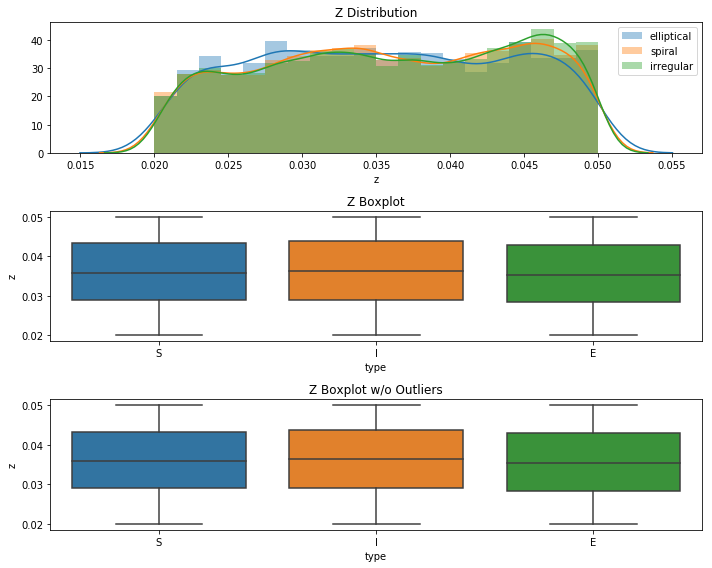

In [22]:
exploratory_plots(data_cl, "z")

_____________________
La columna "z", tiene una ditribución uniforme y no parece tener outliers
_____________________

### Color

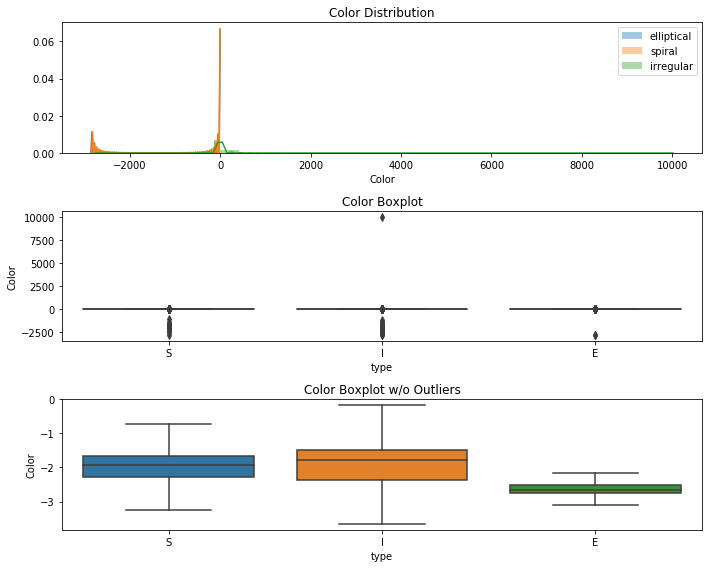

In [23]:
exploratory_plots(data_cl, "Color")

Vemos que hay valores muy extremos, mientras que gran parte de la distribucion esta en valores alrededor de 0

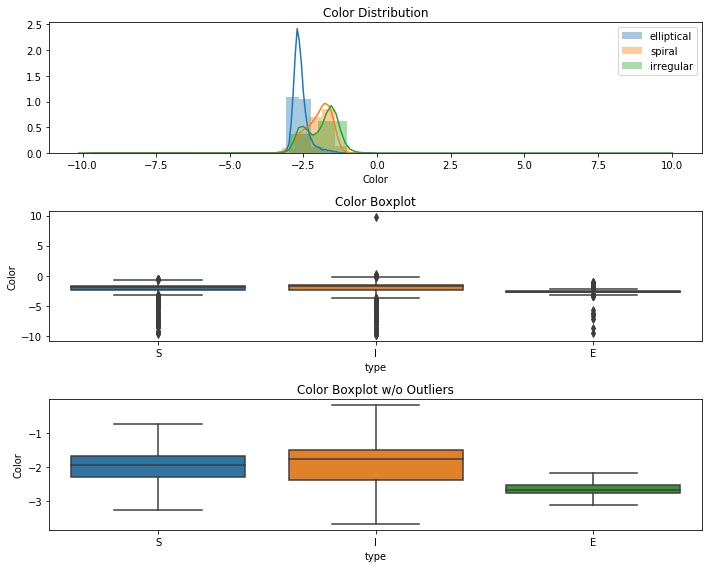

In [24]:
mask_color = (data_cl["Color"] < 10) & (data_cl["Color"]>-10)
exploratory_plots(data_cl[mask_color], "Color")


Podemos decir que los datos de color que tienen sentido deben estar entre 0 y -5

In [25]:
mask_color = (data_cl["Color"] < 0) & (data_cl["Color"]>-5)
data_cl_color = data_cl[mask_color]

In [26]:
print(data_cl.shape)
print(data_cl_color.shape)

(57681, 14)
(57506, 14)


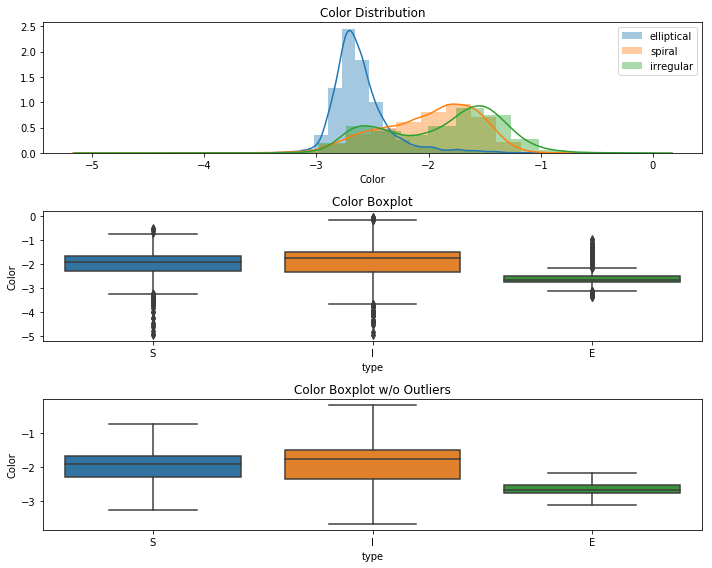

In [27]:
exploratory_plots(data_cl_color, "Color")

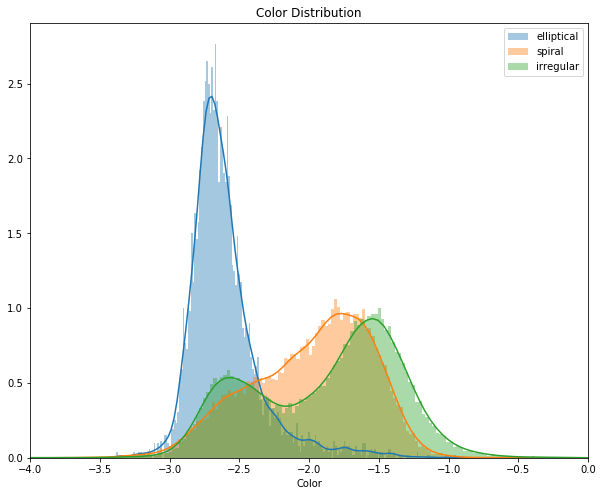

In [28]:
distribution_per_type(data_cl_color, col_name="Color", bins=200)
_ = plt.xlim([-4, 0])

### petroR90_r

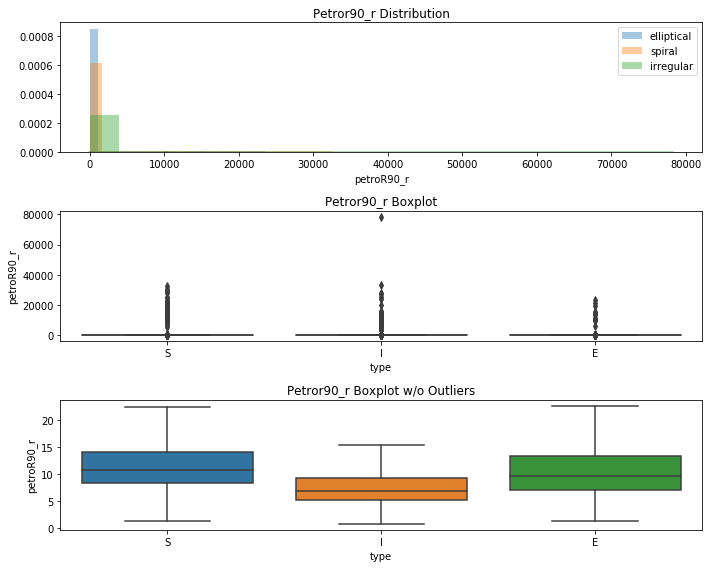

In [29]:
exploratory_plots(data_cl, "petroR90_r")

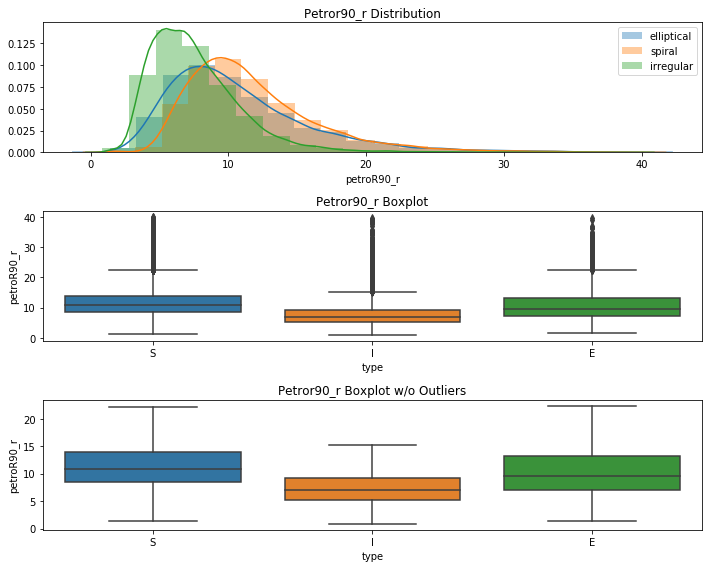

In [30]:
mask_petro = data_cl["petroR90_r"]<40
data_cl_petro = data_cl[mask_petro]
exploratory_plots(data_cl_petro, "petroR90_r")

In [31]:
data_cl_petro = data_cl[data_cl["petroR90_r"]<40]

In [32]:
print(data_cl.shape)
print(data_cl_petro.shape)

(57681, 14)
(57428, 14)


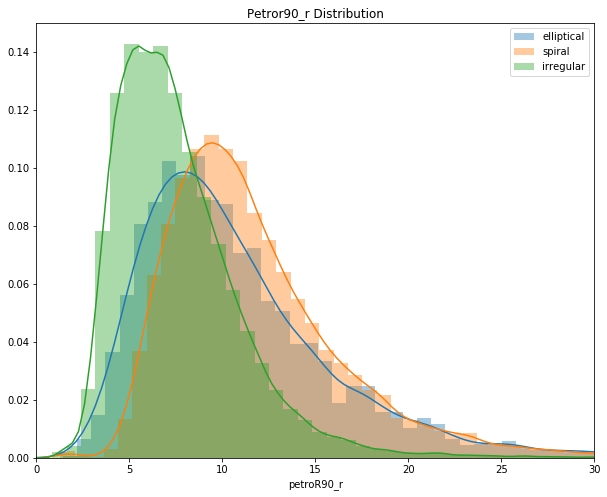

In [33]:
distribution_per_type(data_cl_petro, col_name="petroR90_r", bins=50)
_ = plt.xlim([0, 30])


### Ra

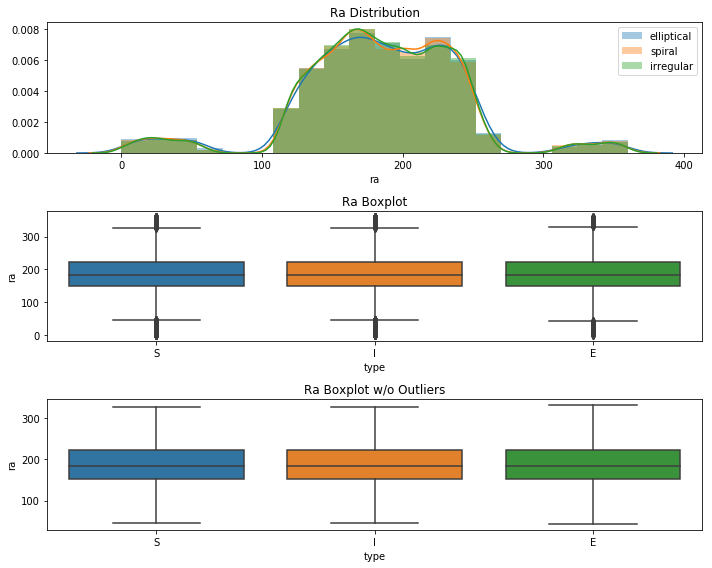

In [34]:
exploratory_plots(data_cl, "ra")

### Mag Distributions

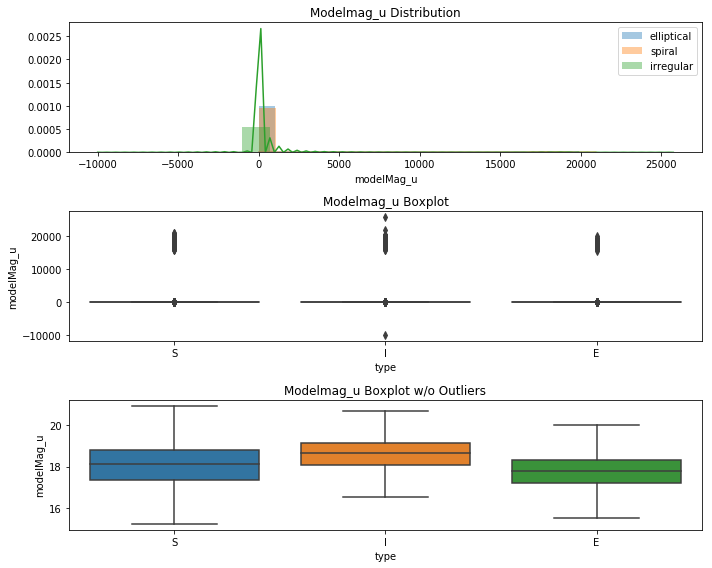

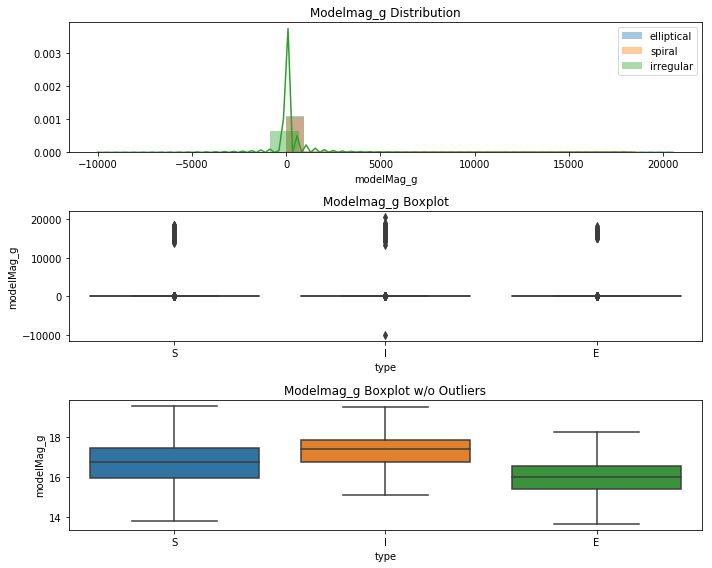

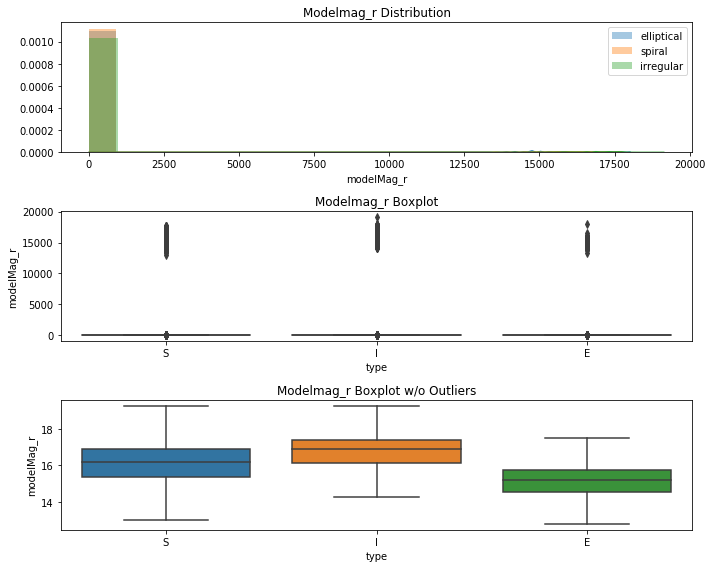

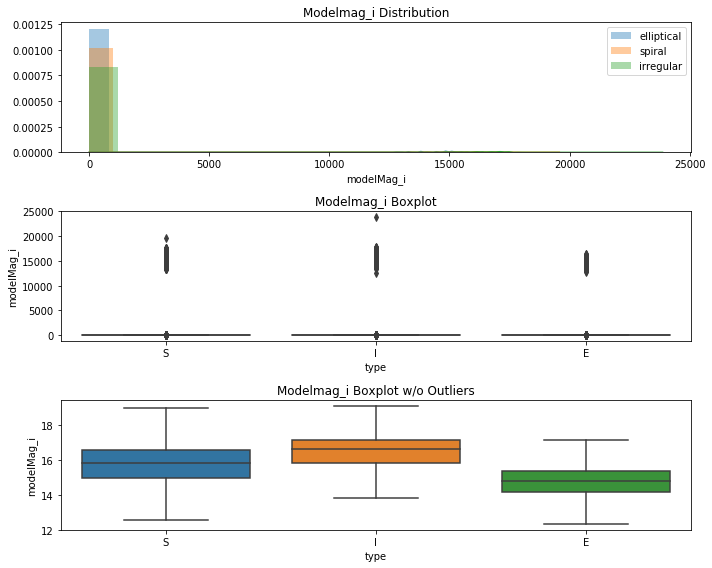

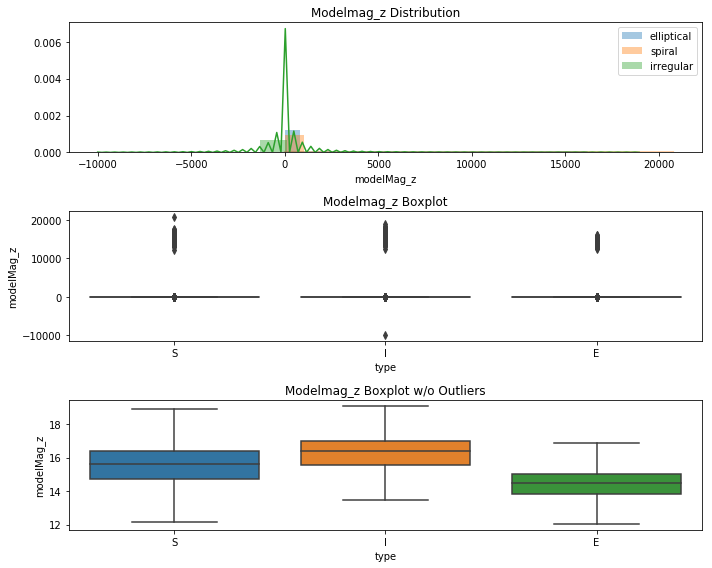

In [35]:
for mag in ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']:
    plt.figure()
    exploratory_plots(data_cl, mag)

In [36]:
mask_mag = ((abs(data_cl["modelMag_u"]) < 30) & 
    (abs(data_cl["modelMag_g"] < 30)) & 
    (abs(data_cl["modelMag_r"] < 30)) & 
    (abs(data_cl["modelMag_i"] < 30)) & 
    (abs(data_cl["modelMag_z"] < 30))) 
data_cl_mag = data_cl[mask_mag]
data_cl_mag.shape

(55164, 14)

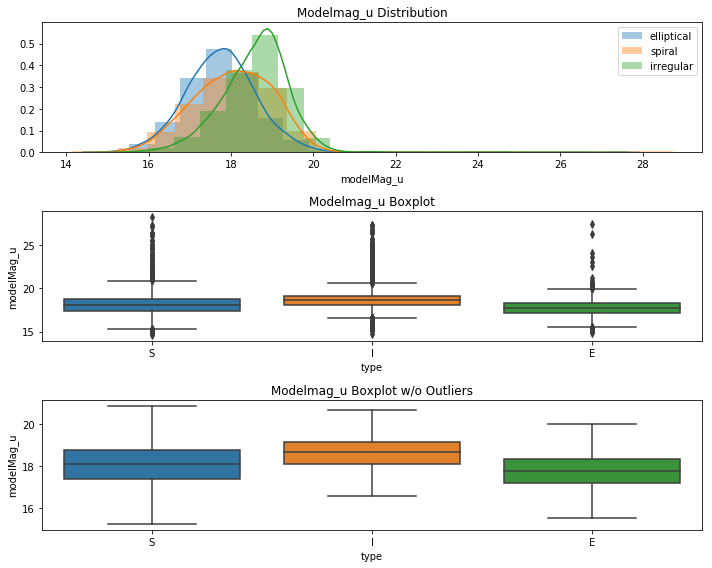

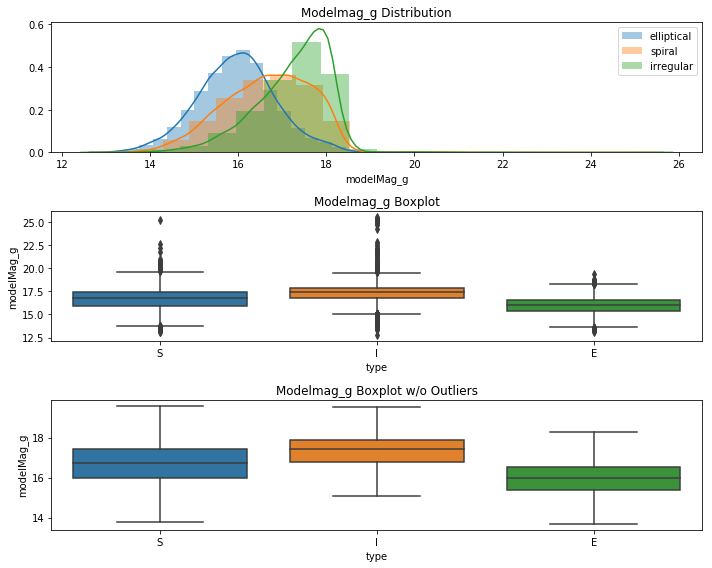

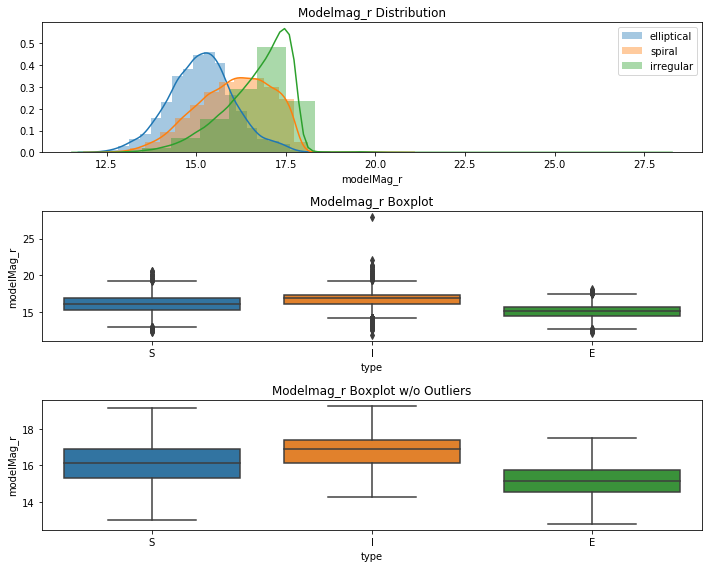

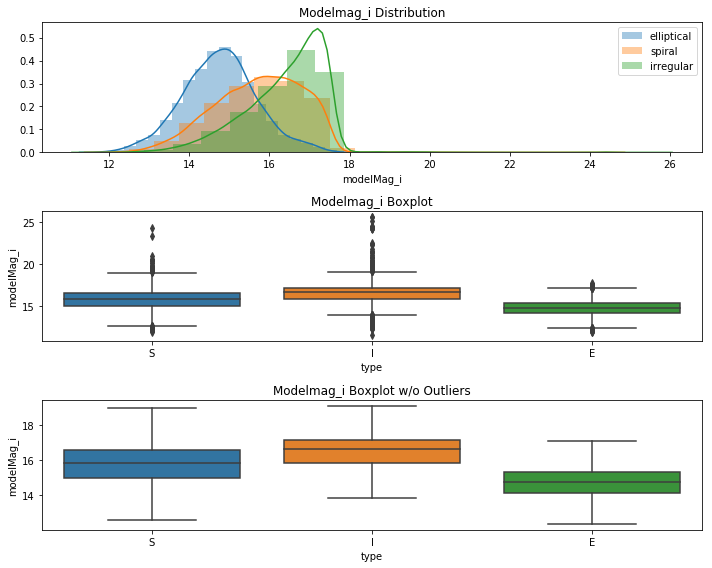

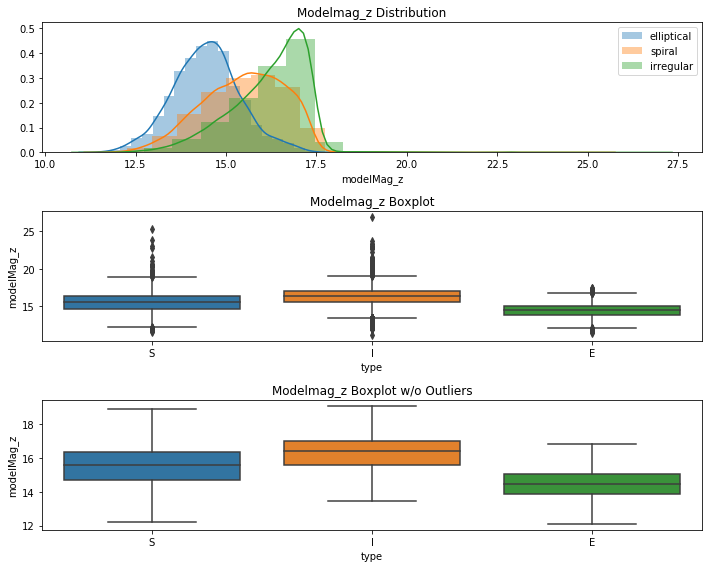

In [37]:
for mag in ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']:
    plt.figure()
    exploratory_plots(data_cl_mag, mag)

In [38]:
mask_no_outl = mask_color & mask_petro & mask_mag
data_cl_no_outl = data_cl[mask_no_outl]
print(data_cl.shape)
print(data_cl_no_outl.shape)
print(data_cl_no_outl.shape[0]/data_cl.shape[0]*100)

(57681, 14)
(54764, 14)
94.94287547025884


Sacando los outliers, solo estoy descartando ~3000 de un total de ~57000. Aun no tengo el 95% de los datos. Por lo tanto acepto el descarte de esots datos

In [39]:
data_cl_no_outl.head()

ra        dec  modelMag_u  modelMag_g  \
objID                                                                  
1,23765119242489E+018  116.519097  39.886407    17.76235    16.72601   
1,23765149575578E+018  116.451900  41.421270    18.12179    16.26214   
1,23767370611537E+018  115.946713  41.918877    18.57293    17.42053   
1,2376737066523E+018   116.051943  42.287231    21.37438    19.77335   
1,23765127349266E+018  117.287392  43.434782    19.18845    17.99682   

                       modelMag_r  modelMag_i  modelMag_z  petroR90_r  \
objID                                                                   
1,23765119242489E+018    16.33972    16.06614    15.90478    8.393773   
1,23765149575578E+018    15.39272    14.97515    14.65105    9.674847   
1,23767370611537E+018    17.01788    16.75617    16.70899   11.277470   
1,2376737066523E+018     19.55791    20.35405    18.88184    1.539542   
1,23765127349266E+018    17.51119    17.26241    17.09056   12.471450   

                              z     Color  elliptical  spiral  uncertain type  
objID                                                                          
1,23765119242489E+018  0.041521 -1.422625           0       1          0    S  
1,23765149575578E+018  0.040211 -2.729061           0       0          1    I  
1,23767370611537E+018  0.024386 -1.555044           0       0          1    I  
1,2376737066523E+018   0.039137 -1.816479           0       0          1    I  
1,23765127349266E+018  0.042591 -1.677259           0       0          1    I

#### Elimino dataframes que no voy a seguir usando

In [40]:
del data_cl_color
del data_cl_mag
del data_cl_petro

In [41]:
def num_type(row):
    if row["type"] == "I":
        return 1
    elif row["type"] == "S":
        return 2
    else:
        return 3
data_cl_no_outl["type_n"] = data_cl_no_outl.apply(num_type,axis=1)
data_cl["type_n"] = data_cl.apply(num_type,axis=1)

/home/frank/anaconda3/envs/diplodatos/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/frank/anaconda3/envs/diplodatos/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Componentes Principales 

Ajuste el modelo de CPA  al dataset con n=3 el número de componentes principales. Grafique.

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [43]:
std_pipe = Pipeline([
        ("std_scaler", StandardScaler()),
        ("pca", PCA(n_components=3))
        ])
minmax_pipe = Pipeline([
        ("minmax_scaler", MinMaxScaler()),
        ("pca", PCA(n_components=3))
        ])
no_scaler_pipe = Pipeline([
        ("pca", PCA(n_components=3))
        ])

## Analisis del dataset sin outliers

In [48]:
data_cl_no_outl.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroR90_r', 'z', 'Color', 'elliptical', 'spiral',
       'uncertain', 'type', 'type_n'],
      dtype='object')

In [49]:
drop_cols = ["ra", "dec","type", "elliptical", "spiral", "uncertain", "type_n"]
pca_minmax = minmax_pipe.fit_transform(data_cl_no_outl.drop(drop_cols, axis=1))
pca_std = std_pipe.fit_transform(data_cl_no_outl.drop(drop_cols, axis=1))
pca_no_scaler = no_scaler_pipe.fit_transform(data_cl_no_outl.drop(drop_cols, axis=1))

print("Explained Variance")
print("With MinMaxScaler: ", minmax_pipe["pca"].explained_variance_ratio_, sum(minmax_pipe["pca"].explained_variance_ratio_))
print("With StandardScaler: ", std_pipe["pca"].explained_variance_ratio_, sum(std_pipe["pca"].explained_variance_ratio_))
print("Without Scaler: ", no_scaler_pipe["pca"].explained_variance_ratio_, sum(no_scaler_pipe["pca"].explained_variance_ratio_))

Explained Variance


TypeError: 'Pipeline' object is not subscriptable

In [75]:
minmax_pipe.steps[1]

('pca',
 PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

## Analisis del dataset con outliers

In [50]:
drop_cols = ["type", "elliptical", "spiral", "uncertain", "type_n"]
pca_minmax2 = minmax_pipe.fit_transform(data_cl.drop(drop_cols, axis=1))
pca_std2 = std_pipe.fit_transform(data_cl.drop(drop_cols, axis=1))
pca_no_scaler2 = no_scaler_pipe.fit_transform(data_cl.drop(drop_cols, axis=1))

print("Explained Variance")
print("With MinMaxScaler: ", minmax_pipe["pca"].explained_variance_ratio_, sum(minmax_pipe["pca"].explained_variance_ratio_))
print("With StandardScaler: ", std_pipe["pca"].explained_variance_ratio_, sum(std_pipe["pca"].explained_variance_ratio_))
print("Without Scaler: ", no_scaler_pipe["pca"].explained_variance_ratio_, sum(no_scaler_pipe["pca"].explained_variance_ratio_))

Explained Variance


TypeError: 'Pipeline' object is not subscriptable

Vemos que dejando outliers que estan muy fuera del rango de intenres, empeora el PCA ya que las componentes principales ya no explican tanto la varianza de los datos

## Graficos 3D

Aprovechando los diferentes PCA que tenemos, vamos a ver si gráficando en 3 dimensiones, podemos ver grupos o patrones en algunas de las variables

In [140]:
def plot_3d(pca, df, colname=""):
    from mpl_toolkits.mplot3d import Axes3D 
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')
    im = ax.scatter(pca[0:10000,0],pca[0:10000,1],pca[0:10000,2], 
           c=df[colname].head(10000),cmap=plt.get_cmap("jet"),
          alpha=0.5)
    ax.set_xlabel("First Principal Component")
    ax.set_ylabel("Second Principal Component")
    ax.set_zlabel("Thrid Principal Component")
    fig.colorbar(im, ax=ax)


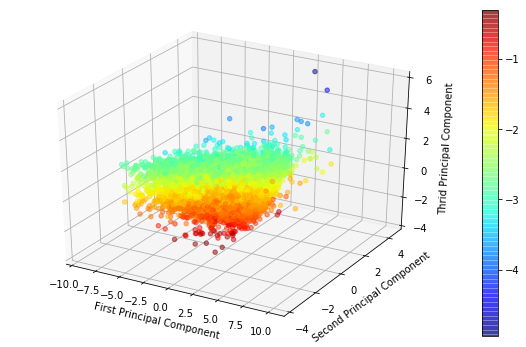

In [141]:
plot_3d(pca_std, data_cl_no_outl, colname="Color")

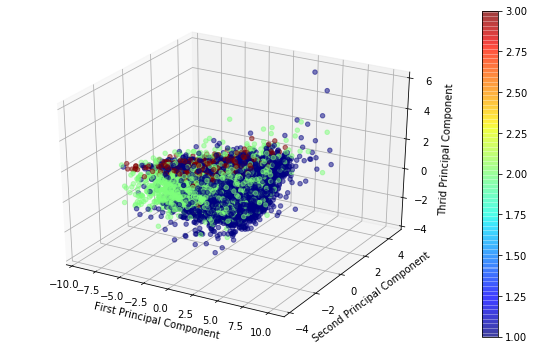

In [142]:
plot_3d(pca_std, data_cl_no_outl, colname="type_n")

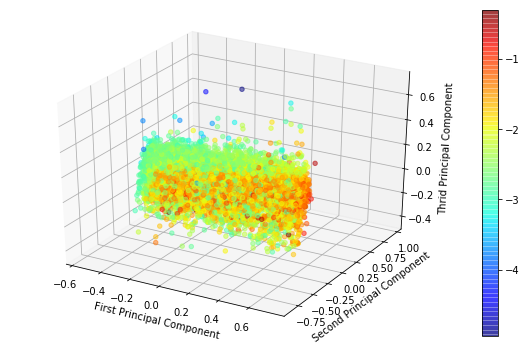

In [143]:
plot_3d(pca_minmax, data_cl_no_outl, colname="Color")

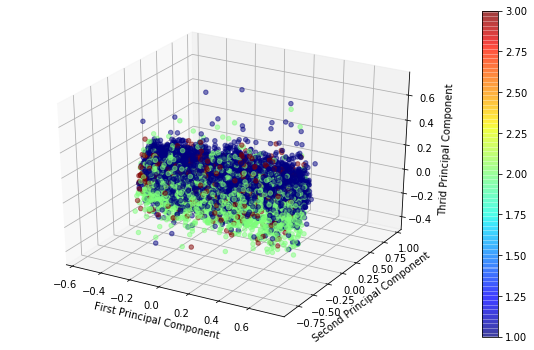

In [144]:
plot_3d(pca_minmax, data_cl_no_outl, colname="type_n")

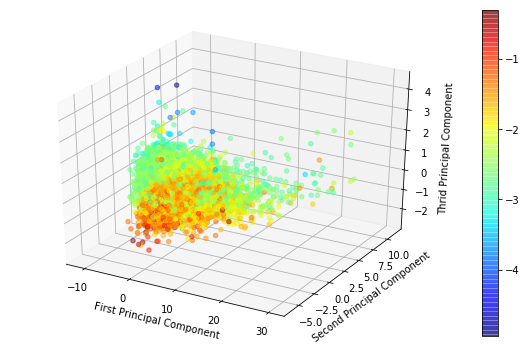

In [115]:
plot_3d(pca_no_scaler, data_cl_no_outl, colname="Color")

## Con todas las columnas

In [133]:
drop_cols = ["ra", "dec", "type","type_n"]
pca_std3 = std_pipe.fit_transform(data_cl_no_outl.drop(drop_cols, axis=1))
pca_minmax3 = minmax_pipe.fit_transform(data_cl_no_outl.drop(drop_cols, axis=1))
pca_no_scaler3 = no_scaler_pipe.fit_transform(data_cl_no_outl.drop(drop_cols, axis=1))

print("Explained Variance")
print("With MinMaxScaler: ", minmax_pipe["pca"].explained_variance_ratio_, sum(minmax_pipe["pca"].explained_variance_ratio_))
print("With StandardScaler: ", std_pipe["pca"].explained_variance_ratio_, sum(std_pipe["pca"].explained_variance_ratio_))
print("Without Scaler: ", no_scaler_pipe["pca"].explained_variance_ratio_, sum(no_scaler_pipe["pca"].explained_variance_ratio_))

Explained Variance
With MinMaxScaler:  [0.64796072 0.15830937 0.12095705] 0.9272271379344538
With StandardScaler:  [0.53139011 0.15418719 0.12800454] 0.8135818500619386
Without Scaler:  [0.86892194 0.09821358 0.01560738] 0.982742905028212


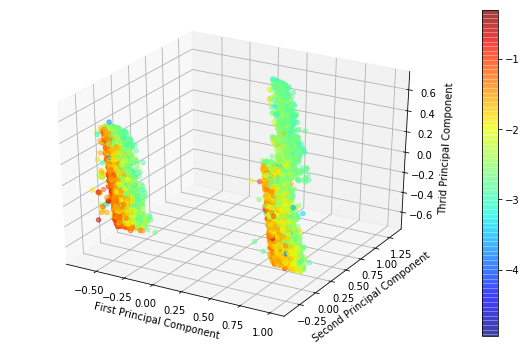

In [134]:
plot_3d(pca_minmax3, data_cl_no_outl, colname="Color")

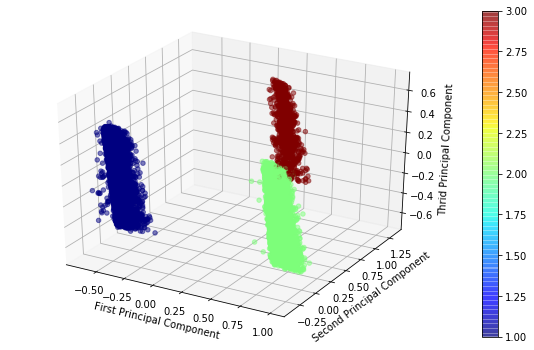

In [135]:
plot_3d(pca_minmax3, data_cl_no_outl, colname="type_n")

In [136]:
data_cl_no_outl.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroR90_r', 'z', 'Color', 'elliptical', 'spiral',
       'uncertain', 'type', 'type_n'],
      dtype='object')

## Graficos 3D Interactivos

In [137]:
data_cl_no_outl.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroR90_r', 'z', 'Color', 'elliptical', 'spiral',
       'uncertain', 'type', 'type_n'],
      dtype='object')

In [51]:
from plotly.offline import plot, init_notebook_mode, iplot
from plotly.graph_objs import *
import numpy as np
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
# x = np.random.randn(2000)
# y = np.random.randn(2000)

# Instead of simply calling plot(...), store your plot as a variable and pass it to displayHTML().
# Make sure to specify output_type='div' as a keyword argument.
# (Note that if you call displayHTML() multiple times in the same cell, only the last will take effect.)

p = iplot([
    Scatter3d(x=pca_std[0:10000,0], y=pca_std[0:10000,1], z=pca_std[0:10000,2],
              mode='markers',
              marker=dict(color=data_cl_no_outl.reset_index().loc[0:10000, 'type_n'],
                          showscale=True,
                          colorscale='Bluered',
                          size=3
                          #cmap=plt.get_cmap("jet")
                         ))
  ],)


ModuleNotFoundError: No module named 'plotly'

In [122]:
p = iplot([
    Scatter3d(x=pca_minmax3[0:10000,0], y=pca_minmax3[0:10000,1], z=pca_minmax3[0:10000,2],
              mode='markers',
              marker=dict(color=data_cl_no_outl.reset_index().loc[0:10000, 'type_n'],
                          showscale=True,
                          colorscale='Bluered',
                          size=3
                          #cmap=plt.get_cmap("jet")
                         ))
  ],)


# Clustering

Aplico modelos de clustering en el dataset, sin usar las columnas relacionadas a la morfologia de la galaxia para ver si alguno de los algoritmos puede encontrar patrones.

### Modificado por Franco Zacco!

In [54]:
from sklearn.cluster import KMeans
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units

In [62]:
def cluster_plotter(df, n_clusters):
           
    kmean = KMeans(n_clusters=n_clusters)
    data_to_cluster = df[['ra', 'dec']]
    cat_pred = kmean.fit_predict(data_to_cluster)
    
    fig = plt.figure(figsize=(18, 14))
    fig.add_subplot(111, projection='aitoff')
    plt.grid(True)
    coords_gx = SkyCoord(data_to_cluster.ra, data_to_cluster.dec, unit='degree')
    ra_gx = coords_gx.ra.wrap_at(180*  units.deg).radian
    dec_gx = coords_gx.dec.radian
    plt.scatter(ra_gx,dec_gx, c=cat_pred, marker='.',s=0.001, cmap='viridis')
    

Si realizamos el clusterizado en un principio con los datos crudos (tanto con outliers y con duplicados) y tomando 30 clusters observamos algunos clusters bastante evidentes a simple vista.

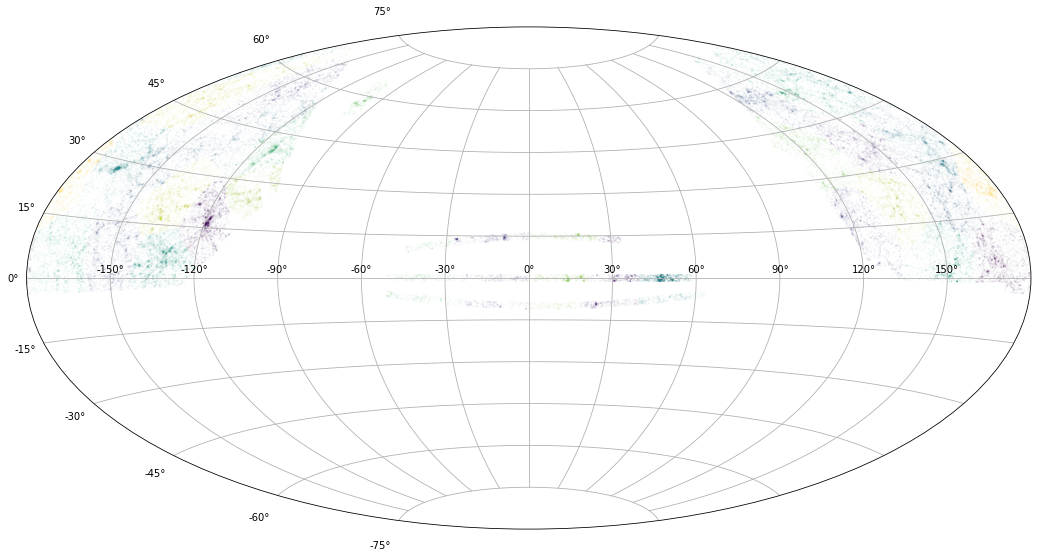

In [68]:
cluster_plotter(data, 30)

Tratamos con mas clusters:

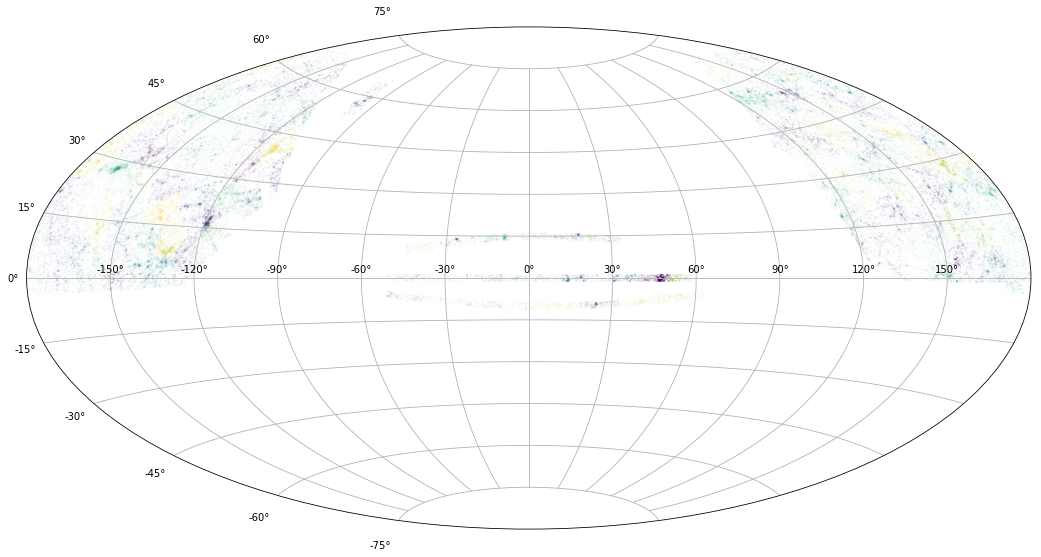

In [69]:
cluster_plotter(data, 100)

Si realizamos el mismo plot con los datos sin los datos duplicados pero con los outliers podemos inferir que una  parte de los clusters que observamos se deben a los datos duplicados.

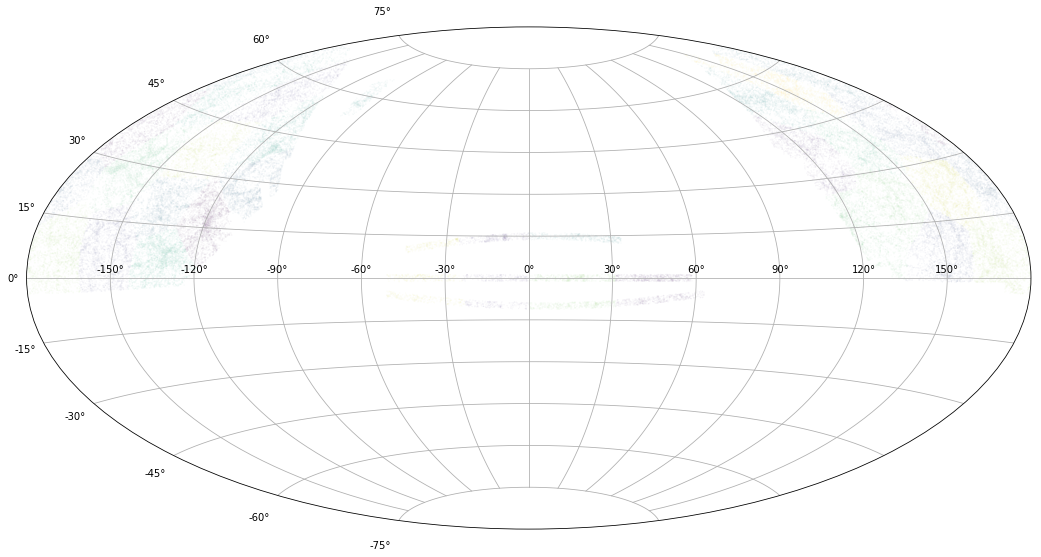

In [67]:
cluster_plotter(data_cl,30)

Tomamos ahora los datos sin duplicados y sin outliers.

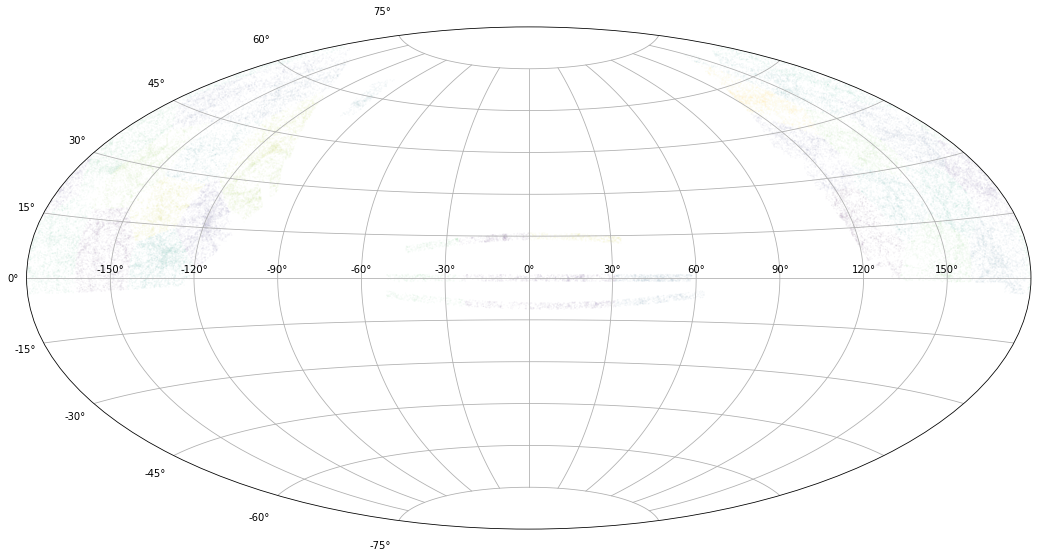

In [66]:
cluster_plotter(data_cl_no_outl, 30)

Tratamos un clusterizado de mayor cantidad.

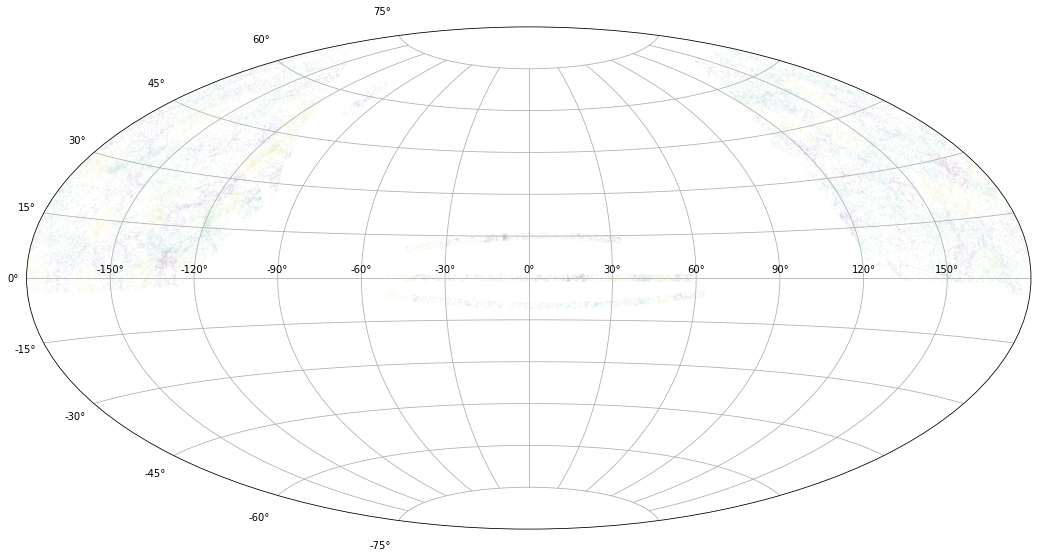

In [64]:
cluster_plotter(data_cl_no_outl, 120)

Notemos que en este caso los cumulos desaparecen casi por completo y vemos una estructura bastante uniforme. Tal vez es un buen momento para consultar al experto de dominio que cantidad de clusters se buscan.

# Docker 

- Declare las versiones exactas de los sofwares usados. 
- Comparta una imagen para poder correr esta notebook.